In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
df = pd.read_csv("Data\Stores.csv")



In [3]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [4]:
df.isnull().sum() #finding out if there are null values

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [5]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [6]:
rng = df["Store_Sales"].max() - df["Store_Sales"].min()
rng

101400

In [7]:
#CONDUCTING THE Z TEST

In [8]:
x = df["Store_Sales"]
mean = df["Store_Sales"].mean()
std = df["Store_Sales"].std()
z = (x-mean)/std

In [9]:
z

0      0.415264
1     -1.136153
2     -0.310708
3     -0.326996
4     -0.740591
         ...   
891    0.409447
892    1.322147
893    0.994064
894    2.167370
895   -0.291512
Name: Store_Sales, Length: 896, dtype: float64

In [10]:
df["z_scores"] = z

In [11]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,z_scores
0,1,1659,1961,530,66490,0.415264
1,2,1461,1752,210,39820,-1.136153
2,3,1340,1609,720,54010,-0.310708
3,4,1451,1748,620,53730,-0.326996
4,5,1770,2111,450,46620,-0.740591


C:\Users\ABOVE ALL OMOLERE\Data_Science_64\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='z_scores', ylabel='Density'>

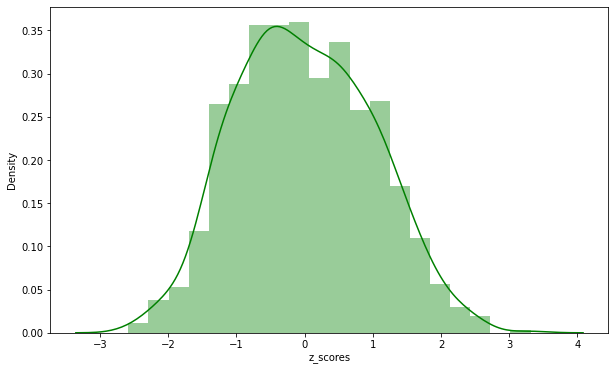

In [12]:
ax = plt.figure(figsize=(10,6))
sb.distplot(df["z_scores"], color="Green")

In [13]:
outl = df[df["z_scores"]>3]#dectecting the outlier.
outl

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,z_scores
649,650,1989,2414,860,116320,3.313917


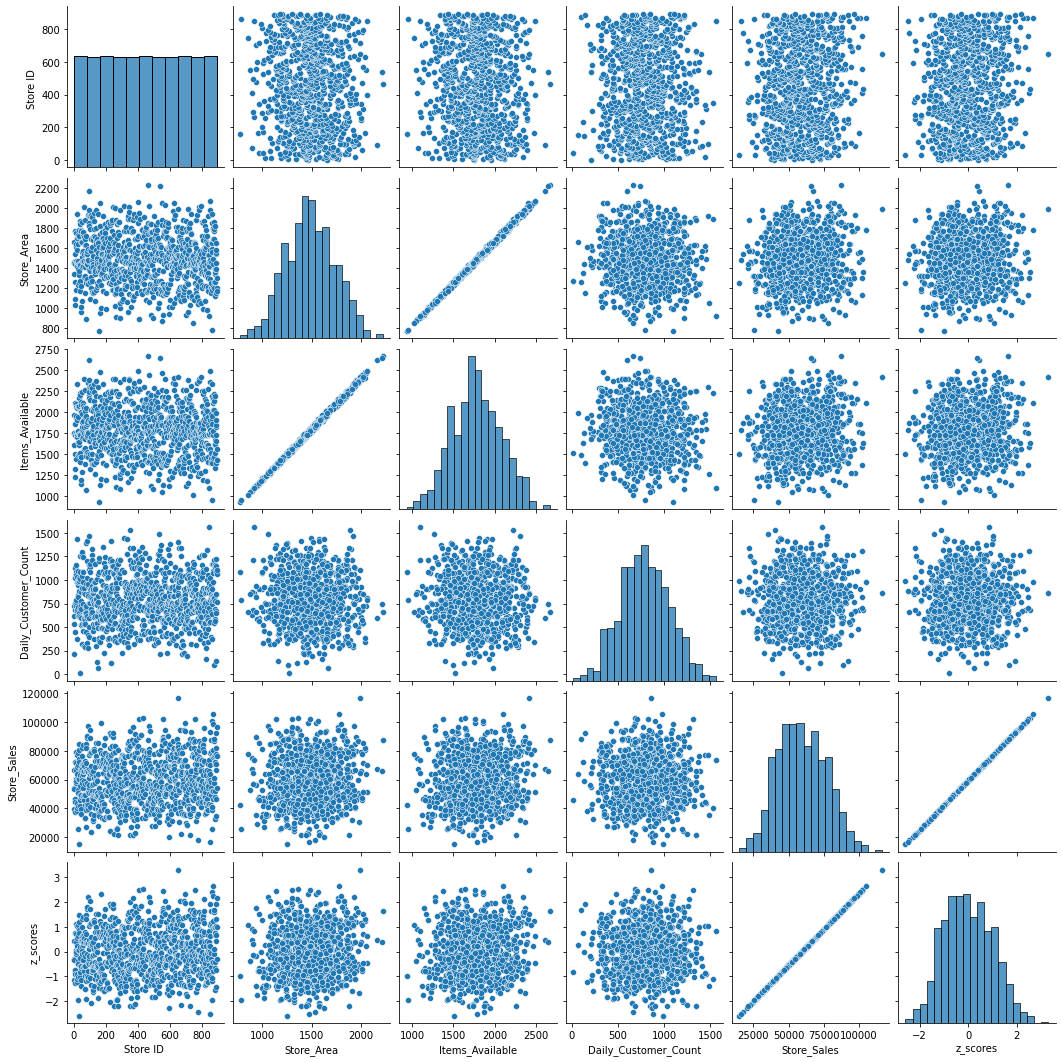

In [13]:
sb.pairplot(df,palette="Paired")

In [15]:
#Density curver showint the frequency of number of items present in each store

In [16]:
df


,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,z_scores
0,1,1659,1961,530,66490,0.415264
1,2,1461,1752,210,39820,-1.136153
2,3,1340,1609,720,54010,-0.310708
3,4,1451,1748,620,53730,-0.326996
4,5,1770,2111,450,46620,-0.740591
...,...,...,...,...,...,...
891,892,1582,1910,1080,66390,0.409447
892,893,1387,1663,850,82080,1.322147
893,894,1200,1436,1060,76440,0.994064
894,895,1299,1560,770,96610,2.167370


<Figure size 720x432 with 0 Axes>

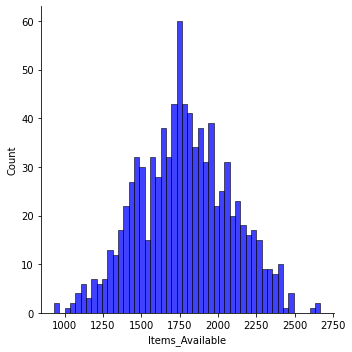

In [17]:
ax = plt.figure(figsize=(10,6))
sb.displot(df["Items_Available"], color="blue",bins=50)

<AxesSubplot:xlabel='Store_Area', ylabel='Items_Available'>

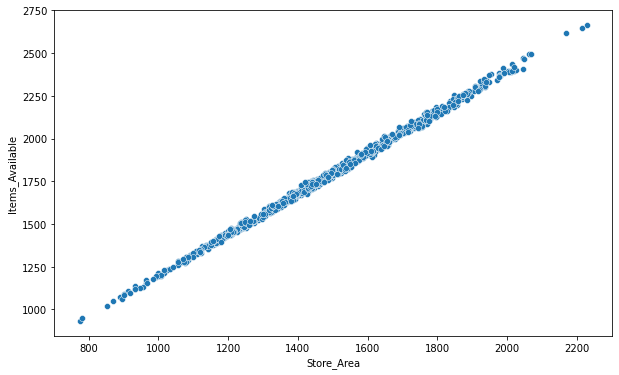

In [18]:
#Scatter plot between the Store Area and Items Available
ax=plt.figure(figsize=(10,6))
sb.scatterplot(x="Store_Area", y="Items_Available",data=df) #Almost  Perfectly positive correlation.

<AxesSubplot:xlabel='Store_Sales', ylabel='Items_Available'>

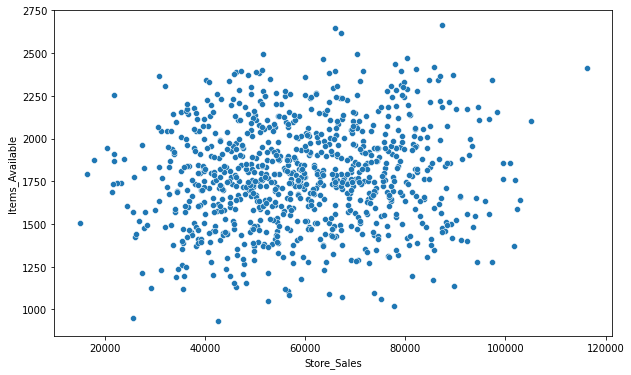

In [19]:
#Scatter plot between the Store sales and Items Available
ax=plt.figure(figsize=(10,6))
sb.scatterplot(x="Store_Sales", y="Items_Available",data=df) #no correlation

<AxesSubplot:xlabel='Store_Sales', ylabel='Store_Area'>

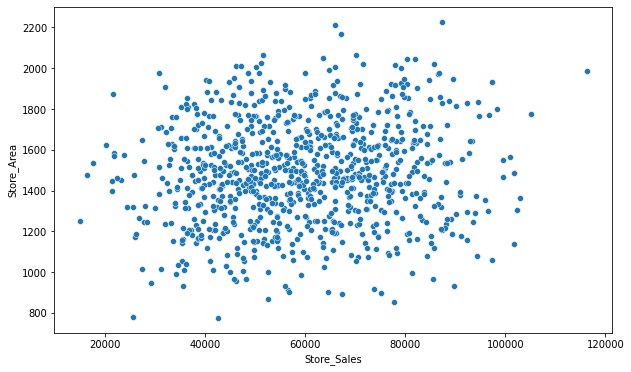

In [20]:
#Scatter plot between the Store Sales and Store Area
ax=plt.figure(figsize=(10,6))
sb.scatterplot(x="Store_Sales", y="Store_Area",data=df) #Almost  Perfectly positive correlation.#Scatter plot between the Store Area and Items Available


<AxesSubplot:>

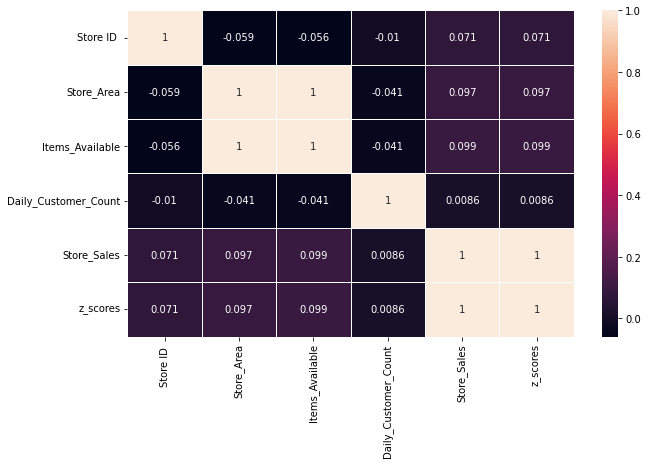

In [21]:
ax = plt.figure(figsize=(10,6))
corr = df.corr()
sb.heatmap(corr, annot=True,linewidths=1,linecolor="white")

# Model

In [22]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,z_scores
0,1,1659,1961,530,66490,0.415264
1,2,1461,1752,210,39820,-1.136153
2,3,1340,1609,720,54010,-0.310708
3,4,1451,1748,620,53730,-0.326996
4,5,1770,2111,450,46620,-0.740591


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [24]:
X = df[["Daily_Customer_Count"]]
y = df[["Store_Sales"]]


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#We will have 20% of train_data

In [26]:
lr=LinearRegression()

In [27]:
lr.fit(X_train, y_train) #fitting the data.

LinearRegression()

In [28]:
intercept=lr.intercept_ #Making no absolute sense.
intercept

array([59900.61346603])

In [29]:
#Coefficient of the data
coef= lr.coef_[0]
coef

array([-0.92995614])

In [30]:
pred = lr.predict(X_test) #Prediction


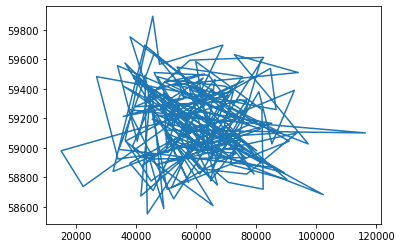

In [66]:
plt.plot(y_test,pred) #Absolutely Understandable by my current level of intelligence

In [60]:
#finding the R squared value to find out how well the model is explained
r2 = (r2_score(y_test,pred))

In [35]:
print(r2*100) #model looks unexplainable due to under fitting.

-0.6291680857297921


In [36]:
error = mean_absolute_error(y_test,pred)
error
#this model has a very high error making it a 

13318.772007845078

# Model 2

In [42]:
X1 = df[["Store_Area"]]
y1 = df[["Items_Available"]]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


In [43]:
lr1 = LinearRegression()

In [46]:
lr1.fit(X1_train, y1_train)

LinearRegression()

In [48]:
intercept1=lr1.intercept_#The intercept of the model.
intercept1

array([5.28213962])

In [53]:
coef1 = lr1.coef_[0] #coefficient of the model.
coef1


array([1.1960332])

In [67]:
pred1 = lr1.predict(X1_test) #Prediction using the model.

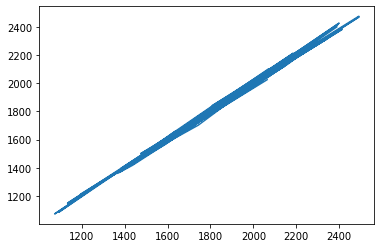

In [69]:
plt.plot(y1_test, pred1)

In [72]:
from sklearn.metrics import r2_score#Finding out the R square data
r2_1 = (r2_score(y1_test, pred1))
print(r2_1*100)

99.75369279818469


In [78]:
from sklearn.metrics import mean_absolute_error
error1 = mean_absolute_error(y1_test, pred1)

In [79]:
error1 #it has a low error.

11.944631101516526

### There We have found That an increase in store area leads to an increase in available items.